In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/matches.csv')

In [3]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
0,CWC,1932-04-14,1-0,Celtic,Scotland,Celtic_F.C.,Liverpool,England,Liverpool_F.C.,"Celtic Park, Glasgow",Semi-finals,76397,1965–66 European Cup Winners' Cup,1965-66
1,ICFC,1955-06-04,0-5,Basel XI,Switzerland,Basel,London XI,England,London_XI,"St. Jakob Stadium, Basel",Group stage,NaN,1955–58 Inter-Cities Fairs Cup,1955-58
2,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",First round,30000,1955–56 European Cup,1955-56
3,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",First round,35000,1955–56 European Cup,1955-56
4,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",First round,7000,1955–56 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26981,EL,2024-05-22,3-0,Atalanta,Italy,Atalanta_BC,Bayer Leverkusen,Germany,Bayer_04_Leverkusen,"Aviva Stadium, Dublin",Final,4,2023–24 UEFA Europa League knockout phase,2023-24
26982,UECL,2024-05-29,1-0 (a.e.t.),Olympiacos,Greece,Olympiacos_F.C.,Fiorentina,Italy,ACF_Fiorentina,"Agia Sophia Stadium, Athens",Final,2,2023–24 UEFA Europa Conference League knockout...,2023-24
26983,UCL,2024-06-01,0-2,Borussia Dortmund,Germany,Borussia_Dortmund,Real Madrid,Spain,Real_Madrid_CF,"Wembley Stadium, London",Final,8,2023–24 UEFA Champions League knockout phase,2023-24
26984,UCL,NaN,Match unplayed,Derry City,Northern Ireland,Derry_City_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,NaN,First round,NaN,1965–66 European Cup,1965-66


In [4]:
df['city'] = df['location'].apply(lambda x: x.split(',')[-1].split('(')[0].strip() if isinstance(x, str) else x)

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [6]:
serious = ['Groups','Round of 32','Round of 16','Quarter-finals','Semi-finals','Final']

In [7]:
easternCountries = ['Hungary','Poland','Socialist Federal Republic of Yugoslavia','Romania','Czechoslovakia','Bulgaria','East Germany','Albania','Soviet Union','Commonwealth of Independent States','Slovenia','Estonia','Latvia','Ukraine','Russia','Lithuania','Georgia (country)','Moldova','Croatia','Belarus','Czech Republic','Federal Republic of Yugoslavia','North Macedonia','Armenia','Azerbaijan','Slovakia','Bosnia and Herzegovina','Kazakhstan','Serbia and Montenegro','Serbia','Montenegro','Kosovo']

In [8]:
easternGermanClubs = df[df['homeTeamCountry'] == 'East Germany']['homeTeamUrl'].drop_duplicates().to_list() + ['RB_Leipzig','1._FC_Union_Berlin','1._FC_Magdeburg','Hallescher_FC','FC_Rot-Wei%C3%9F_Erfurt']

In [9]:
df['phase'].drop_duplicates().to_list()

['Semi-finals',
 'Group stage',
 'First round',
 'Quarter-finals',
 'Final',
 'Preliminary round',
 'Knockout stage',
 'Second round',
 'Notes',
 'Third round',
 'Quarter–finals',
 'Semi–finals',
 'Second Round',
 'Qualifying round',
 'Matches',
 'Groups',
 'Match',
 'Group A',
 'Group D',
 'Group B',
 'Group C',
 'Round of 16',
 'Finals',
 'First qualifying round',
 'Second qualifying round',
 'Summary',
 'Third qualifying round',
 'Fourth round',
 'Round of 32',
 'Play-off round',
 'Teams',
 'Knockout round play-offs']

In [10]:
east = df[df['homeTeamCountry'].isin(easternCountries) | df['homeTeamUrl'].isin(easternGermanClubs)]
east2 =  df[df['homeTeamCountry'].isin(easternCountries) | df['homeTeamUrl'].isin(easternGermanClubs) | df['awayTeamCountry'].isin(easternCountries) | df['awayTeamUrl'].isin(easternGermanClubs)]
four = df[df['homeTeamCountry'].isin(['Germany','West Germany','Italy','Spain','England'])]

In [11]:
east[east['phase'] == 'Final'].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city
700,ICFC,1963-06-12,1-2,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,GNK_Dinamo_Zagreb,Valencia,Spain,Valencia_CF,"Stadion Maksimir, Zagreb",Final,40000,1962–63 Inter-Cities Fairs Cup,1962-63,Zagreb
1398,ICFC,1968-09-11,0-0,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Leeds United,England,Leeds_United_F.C.,"Népstadion, Budapest",Final,76000.0,1967–68 Inter-Cities Fairs Cup,1967-68,Budapest
1503,CWC,1969-05-21,3-2,Slovan Bratislava,Czechoslovakia,%C5%A0K_Slovan_Bratislava,Barcelona,Spain,FC_Barcelona,"St. Jakob Stadium, Basel",Final,19000.0,1968–69 European Cup Winners' Cup,1968-69,Basel
2533,CWC,1974-05-08,2-0,Magdeburg,East Germany,1._FC_Magdeburg,Milan,Italy,A.C._Milan,"De Kuip, Rotterdam",Final,4641,1973–74 European Cup Winners' Cup,1973-74,Rotterdam
2741,CWC,1975-05-14,3-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"St. Jakob Stadium, Basel",Final,13000.0,1974–75 European Cup Winners' Cup,1974-75,Basel
3479,EL,1979-05-09,1-1,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Borussia Mönchengladbach,West Germany,Borussia_M%C3%B6nchengladbach,"Red Star Stadium, Belgrade",Final,64312,1978–79 UEFA Cup,1978-79,Belgrade
3918,CWC,1981-05-13,2-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,FC Carl Zeiss Jena,East Germany,FC_Carl_Zeiss_Jena,"Rheinstadion, Düsseldorf",Final,4750.0,1980–81 European Cup Winners' Cup,1980-81,Düsseldorf
4919,EL,1985-05-08,0-3,Videoton,Hungary,Videoton_FC,Real Madrid,Spain,Real_Madrid_CF,"Sóstói Stadion, Székesfehérvár",Final,35000,1984–85 UEFA Cup,1984-85,Székesfehérvár
5164,CWC,1986-05-02,3-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Stade de Gerland, Lyon",Final,39300,1985–86 European Cup Winners' Cup,1985-86,Lyon
5166,UCL,1986-05-07,0-0 (a.e.t.),Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Barcelona,Spain,FC_Barcelona,"Estadio Ramón Sánchez Pizjuán, Seville",Final,65000,1985–86 European Cup,1985-86,Seville


In [12]:
east[east['phase'].isin(serious)].groupby('location')['homeTeamUrl'].nunique().nlargest(50)

location
Népstadion, Budapest                               7
Arena Națională, Bucharest                         5
Luzhniki Stadium, Moscow                           5
Vasil Levski National Stadium, Sofia               5
Arena Lviv, Lviv                                   4
Stadionul Steaua, Bucharest                        4
Dynamo Stadium, Moscow                             3
Kuban Stadium, Krasnodar                           3
Lokomotiv Stadium, Moscow                          3
NSC Olimpiyskiy Stadium, Kyiv                      3
Arena Khimki, Khimki                               2
Astana Arena, Astana                               2
Bazaly, Ostrava                                    2
Borisov Arena, Barysaw                             2
Central Dynamo Stadium, Moscow                     2
Chornomorets Stadium, Odesa                        2
Dinamo Stadium, Minsk                              2
Eduard Streltsov Stadium, Moscow                   2
Gradski Stadion Maksimir, Zagreb     

In [13]:
east[east['phase'].isin(serious)].groupby('homeTeamCountry')['location'].nunique().nlargest(50)

homeTeamCountry
Ukraine                                     34
Russia                                      32
Socialist Federal Republic of Yugoslavia    26
Romania                                     24
Soviet Union                                23
Czech Republic                              23
Czechoslovakia                              20
Poland                                      19
Hungary                                     18
Bulgaria                                    14
East Germany                                11
Croatia                                      9
Slovakia                                     7
Germany                                      7
Serbia                                       7
Azerbaijan                                   6
Belarus                                      4
Slovenia                                     3
Serbia and Montenegro                        3
Kazakhstan                                   3
Moldova                                     

In [14]:
east[east['phase'].isin(serious)].groupby('city').size().nlargest(60)

city
Moscow              168
Prague              135
Kyiv                132
Bucharest            99
Belgrade             96
Zagreb               68
Saint Petersburg     67
Budapest             57
Sofia                56
Donetsk              47
Warsaw               39
Baku                 37
Plzeň                34
Leipzig              33
Cluj-Napoca          30
Kharkiv              30
Krasnodar            29
Lviv                 26
Bratislava           25
Razgrad              23
Maribor              22
Kazan                21
Astana               19
Barysaw              19
Minsk                18
Poznań               18
Tiraspol             18
Dnipropetrovsk       17
Liberec              17
Khimki               16
Split                14
Berlin               13
Rijeka               13
Tbilisi              13
Trnava               11
Kraków               10
Dresden               8
Odesa                 8
Yerevan               7
Elbasan               6
Košice                6
Riga       

In [15]:
east[east['phase'].isin(serious)].groupby('location').size().nlargest(50)

location
Luzhniki Stadium, Moscow                           69
Stadion Maksimir, Zagreb                           57
Petrovsky Stadium, Saint Petersburg                48
Lokomotiv Stadium, Moscow                          38
Stadionul Steaua, Bucharest                        38
Vasil Levski National Stadium, Sofia               38
Partizan Stadium, Belgrade                         37
Arena Națională, Bucharest                         33
Metalist Stadium, Kharkiv                          30
Olympic Stadium, Kyiv                              29
Doosan Arena, Plzeň                                28
Red Bull Arena, Leipzig                            28
Red Star Stadium, Belgrade                         27
Stadionul Dr. Constantin Rădulescu, Cluj-Napoca    27
Generali Arena, Prague                             26
NSC Olimpiyskiy Stadium, Kyiv                      26
Arena Lviv, Lviv                                   22
Ljudski vrt, Maribor                               22
Stadion Letná, Prag

In [16]:
east[east['phase'] == 'Semi-finals'].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city
9752,CWC,1999-04-08,1-1,Lokomotiv Moscow,Russia,FC_Lokomotiv_Moscow,Lazio,Italy,S.S._Lazio,"Lokomotiv Stadium, Moscow",Semi-finals,2,1998–99 UEFA Cup Winners' Cup,1998-99,Moscow
9895,Intertoto,1999-07-28,0-4,Rostselmash,Russia,FC_Rostov,Juventus,Italy,Juventus_FC,"Rostselmash Stadium, Rostov-on-Don",Semi-finals,17000.0,1999 UEFA Intertoto Cup,1998-99,Rostov-on-Don
9914,Intertoto,1999-08-04,1-1,Polonia Warsaw,Poland,Polonia_Warsaw,Metz,France,FC_Metz,"Stadion Polonii Warszawa, Warsaw",Semi-finals,2000.0,1999 UEFA Intertoto Cup,1998-99,Warsaw
11808,Intertoto,2002-08-07,0-1,Slaven Belupo,Croatia,NK_Slaven_Belupo,Stuttgart,Germany,VfB_Stuttgart,"Gradski stadion, Koprivnica",Semi-finals,3500,2002 UEFA Intertoto Cup,2001-02,Koprivnica
11809,Intertoto,2002-08-07,1-3,Teplice,Czech Republic,FK_Teplice,Bologna,Italy,Bologna_F.C._1909,"Na Stínadlech, Teplice",Semi-finals,2700,2002 UEFA Intertoto Cup,2001-02,Teplice
12433,Intertoto,2003-07-30,1-1,Brno,Czech Republic,FC_Zbrojovka_Brno,Villarreal,Spain,Villarreal_CF,"Městský fotbalový stadion Srbská, Brno",Semi-finals,10506,2003 UEFA Intertoto Cup,2002-03,Brno
12438,Intertoto,2003-07-30,1-4,Cibalia,Croatia,HNK_Cibalia,Wolfsburg,Germany,VfL_Wolfsburg,"Stadion HNK Cibalia, Vinkovci",Semi-finals,3450,2003 UEFA Intertoto Cup,2002-03,Vinkovci
12449,Intertoto,2003-08-06,0-0,Slovan Liberec,Czech Republic,FC_Slovan_Liberec,Schalke 04,Germany,FC_Schalke_04,"Stadion u Nisy, Liberec",Semi-finals,9090,2003 UEFA Intertoto Cup,2002-03,Liberec
12451,Intertoto,2003-08-06,1-0,Koper,Slovenia,FC_Koper,Heerenveen,Netherlands,SC_Heerenveen,"Bonifika Stadium, Koper",Semi-finals,2000,2003 UEFA Intertoto Cup,2002-03,Koper
13065,Intertoto,2004-07-28,1-3,OFK Beograd,Serbia and Montenegro,OFK_Beograd,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Omladinski Stadium, Belgrade",Semi-finals,7000,2004 UEFA Intertoto Cup,2003-04,Belgrade


In [17]:
east[east['phase'] == 'Quarter-finals'].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city
17769,EL,2011-04-07,1-1,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Braga,Portugal,S.C._Braga,"Lobanovsky Dynamo Stadium, Kyiv",Quarter-finals,16115,2010–11 UEFA Europa League knockout phase,2010-11,Kyiv
17774,UCL,2011-04-12,0-1,Shakhtar Donetsk,Ukraine,NaN,Barcelona,Spain,NaN,"Donbass Arena, Donetsk",Quarter-finals,51759,2010–11 UEFA Champions League knockout phase,2010-11,Donetsk
17779,EL,2011-04-14,2-5,Spartak Moscow,Russia,FC_Spartak_Moscow,Porto,Portugal,FC_Porto,"Luzhniki Stadium, Moscow",Quarter-finals,17088,2010–11 UEFA Europa League knockout phase,2010-11,Moscow
18474,EL,2012-04-05,1-1,Metalist Kharkiv,Ukraine,FC_Metalist_Kharkiv,Sporting CP,Portugal,Sporting_Clube_de_Portugal,"Metalist Stadium, Kharkiv",Quarter-finals,3,2011–12 UEFA Europa League knockout phase,2011-12,Kharkiv
19163,EL,2013-04-11,3-2,Rubin Kazan,Russia,FC_Rubin_Kazan,Chelsea,England,Chelsea_F.C.,"Luzhniki Stadium, Moscow",Quarter-finals,1,2012–13 UEFA Europa League knockout phase,2012-13,Moscow
20548,EL,2015-04-16,1-1,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Fiorentina,Italy,ACF_Fiorentina,"Olympic Stadium, Kyiv",Quarter-finals,6,2014–15 UEFA Europa League knockout phase,2014-15,Kyiv
20556,EL,2015-04-23,2-2,Zenit Saint Petersburg,Russia,FC_Zenit_Saint_Petersburg,Sevilla,Spain,Sevilla_FC,"Petrovsky Stadium, Saint Petersburg,",Quarter-finals,1,2014–15 UEFA Europa League knockout phase,2014-15,
20558,EL,2015-04-23,1-0,Dnipro Dnipropetrovsk,Ukraine,FC_Dnipro,Club Brugge,Belgium,Club_Brugge_KV,"Olympic Stadium, Kyiv",Quarter-finals,1,2014–15 UEFA Europa League knockout phase,2014-15,Kyiv
21249,EL,2016-04-14,4-0,Shakhtar Donetsk,Ukraine,NaN,Braga,Portugal,NaN,"Arena Lviv, Lviv",Quarter-finals,3,2015–16 UEFA Europa League knockout phase,2015-16,Lviv
21250,EL,2016-04-14,2-4,Sparta Prague,Czech Republic,NaN,Villarreal,Spain,NaN,"Generali Arena, Prague",Quarter-finals,1,2015–16 UEFA Europa League knockout phase,2015-16,Prague


In [18]:
df.groupby(['competition','phase'])['homeTeam'].nunique().head(250).tail(60)

competition  phase                   
EL           Preliminary round           161
             Qualifying round            179
             Quarter-finals              174
             Quarter–finals               16
             Round of 16                 127
             Round of 32                 178
             Second qualifying round     559
             Second round                357
             Semi-finals                 108
             Semi–finals                   8
             Summary                     309
             Teams                        62
             Third qualifying round      357
             Third round                 233
ICFC         Final                        11
             First round                 173
             Group stage                  10
             Knockout stage                4
             Quarter-finals               37
             Second round                 91
             Semi-finals                  27
             Thir

In [19]:
df[df['homeTeamCountry'] == 'Germany']['homeTeamUrl'].drop_duplicates()

380                        1._FC_N%C3%BCrnberg
647                              Bayern_Munich
669                           FC_Bayern_Munich
742                          Borussia_Dortmund
806                               Hamburger_SV
1285                       Eintracht_Frankfurt
2280             Borussia_M%C3%B6nchengladbach
3679                             VfB_Stuttgart
3912                           1._FC_K%C3%B6ln
6282                            Dynamo_Dresden
6292                           1._FC_Magdeburg
6334                       Bayer_04_Leverkusen
6427                      1._FC_Kaiserslautern
6435     Eisenh%C3%BCttenst%C3%A4dter_FC_Stahl
6459                             Hallescher_FC
6487                          SV_Werder_Bremen
6521                   FC_Rot-Wei%C3%9F_Erfurt
6782                               Hannover_96
7009                             Karlsruher_SC
7862                               SC_Freiburg
8147                     TSV_1860_M%C3%BCnchen
8402         

<Axes: xlabel='season'>

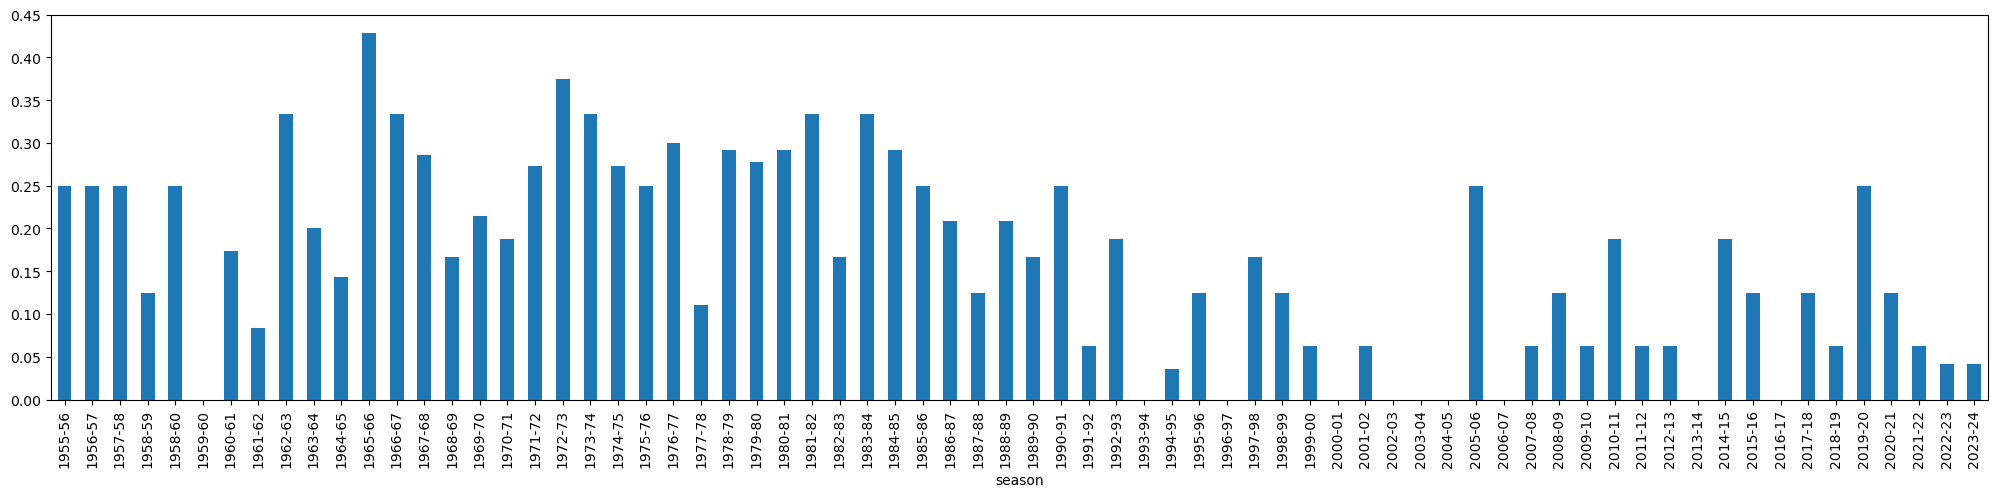

In [20]:
pd.Series(east[east['phase'] == 'Quarter-finals'].groupby('season')['homeTeam'].nunique() / df[df['phase'] == 'Quarter-finals'].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [21]:
df['competition']

0         CWC
1        ICFC
2         UCL
3         UCL
4         UCL
         ... 
26981      EL
26982    UECL
26983     UCL
26984     UCL
26985      EL
Name: competition, Length: 26986, dtype: object

<Axes: xlabel='season'>

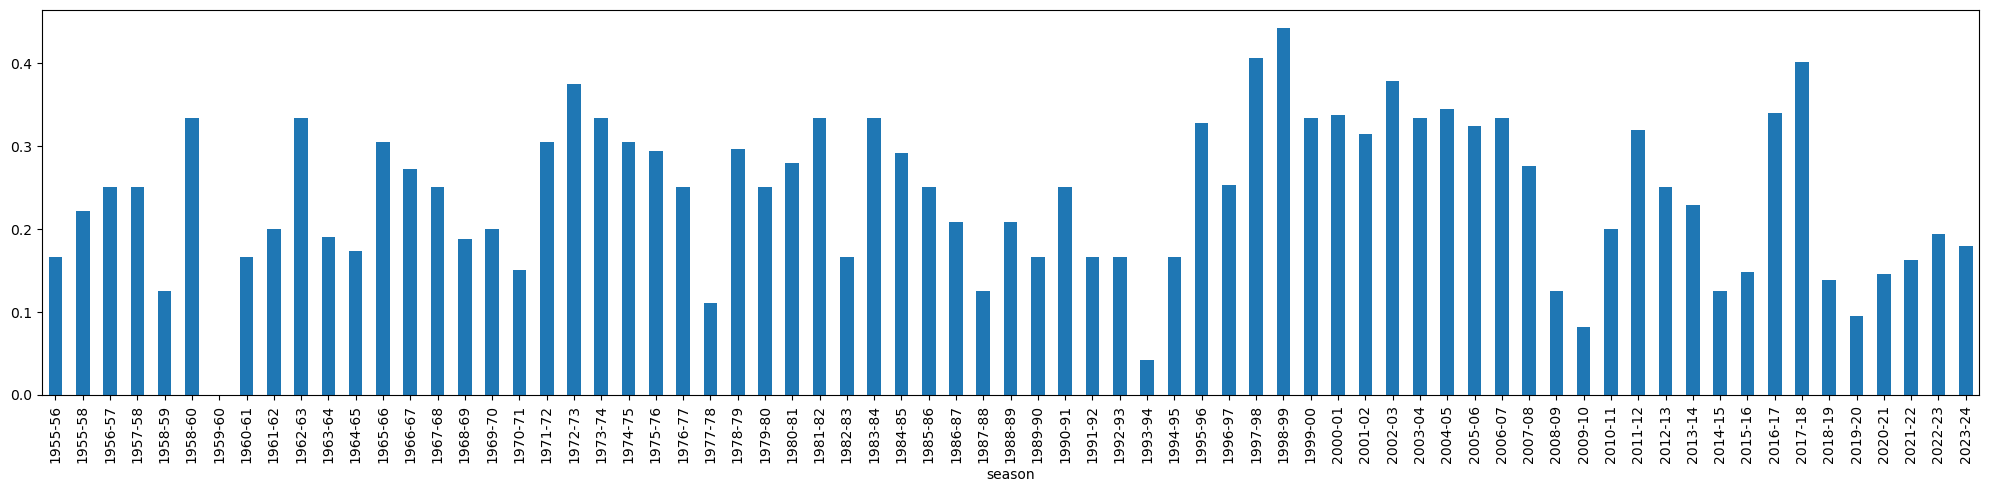

In [22]:
pd.Series(east[east['date'].dt.month.isin([1,2,3,4,5,6])].groupby('season')['homeTeam'].nunique() / df[df['date'].dt.month.isin([1,2,3,4,5,6])].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

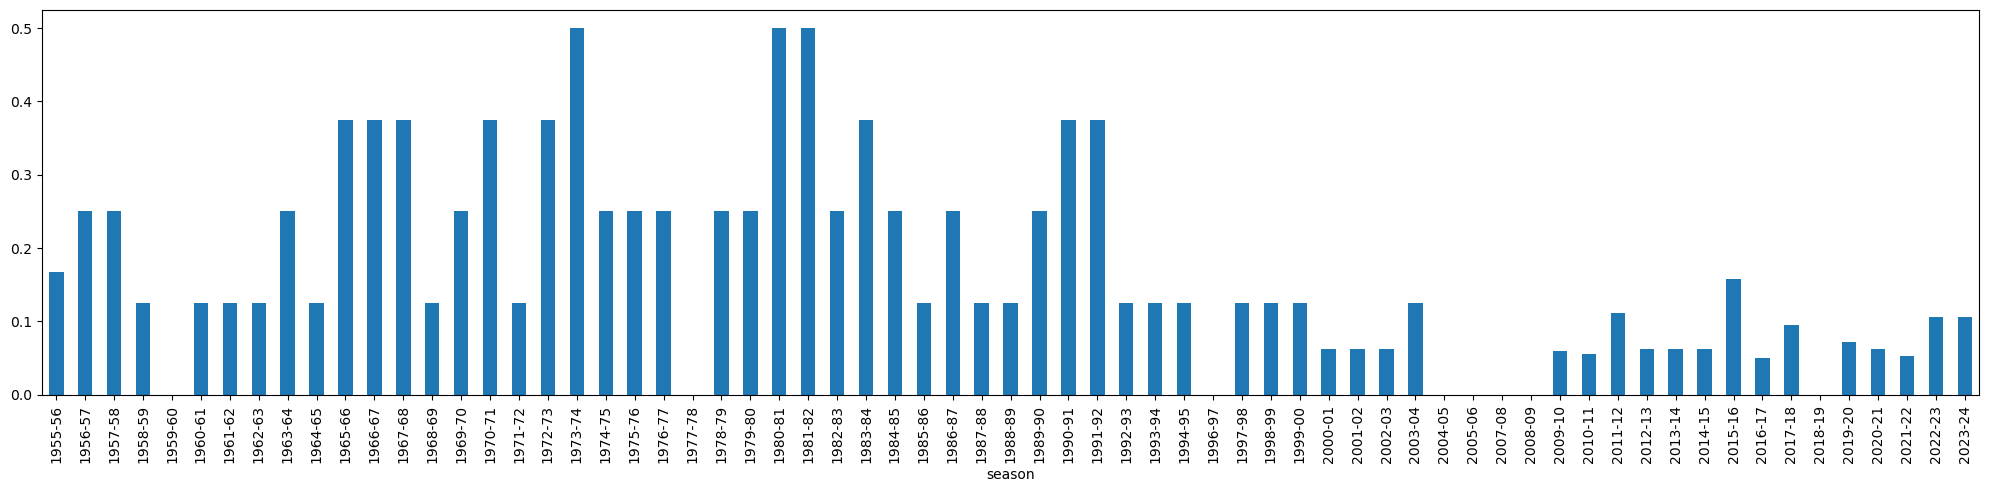

In [23]:
pd.Series(east[(east['date'].dt.month.isin([1,2,3,4,5,6])) & (east['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique() / df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

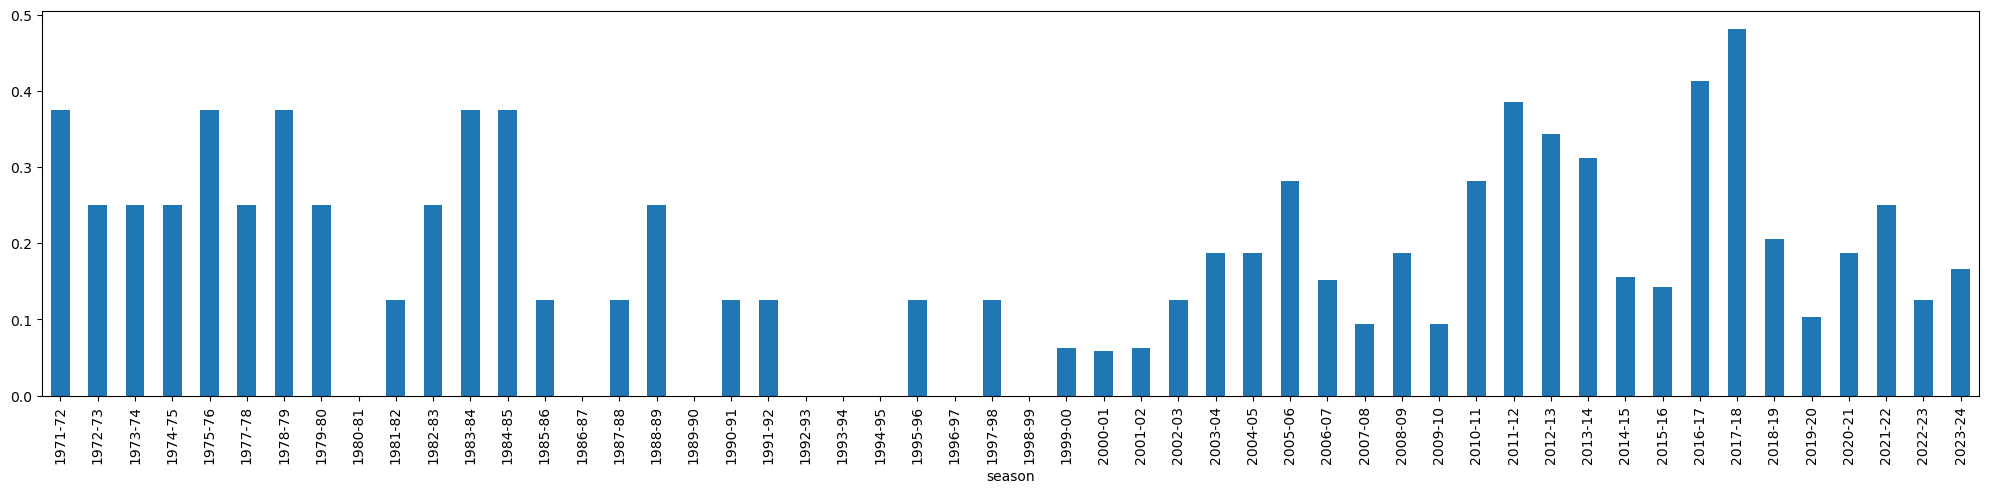

In [24]:
pd.Series(east[(east['date'].dt.month.isin([1,2,3,4,5,6])) & (east['competition'] == 'EL')].groupby('season')['homeTeam'].nunique() / df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'EL')].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

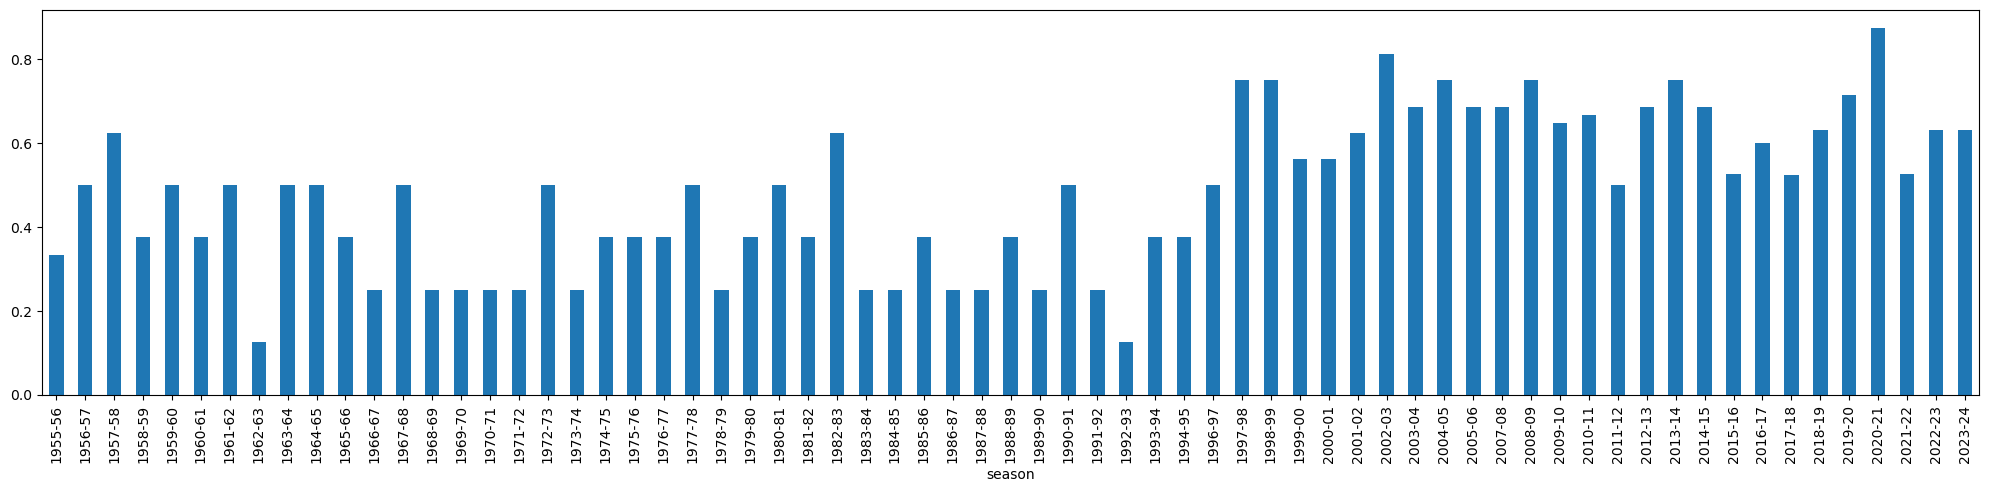

In [25]:
pd.Series(four[(four['date'].dt.month.isin([1,2,3,4,5,6])) & (four['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique() / df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [26]:
df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique().tail(40)

season
1982-83     8
1983-84     8
1984-85     8
1985-86     8
1986-87     8
1987-88     8
1988-89     8
1989-90     8
1990-91     8
1991-92     8
1992-93     8
1993-94     8
1994-95     8
1996-97     8
1997-98     8
1998-99     8
1999-00    16
2000-01    16
2001-02    16
2002-03    16
2003-04    16
2004-05    16
2005-06    16
2007-08    16
2008-09    16
2009-10    17
2010-11    18
2011-12    18
2012-13    16
2013-14    16
2014-15    16
2015-16    19
2016-17    20
2017-18    21
2018-19    19
2019-20    14
2020-21    16
2021-22    19
2022-23    19
2023-24    19
Name: homeTeam, dtype: int64

In [27]:
east[(east['date'].dt.month.isin([1,2,3,4,5,6])) & (east['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique().tail(40)

season
1975-76    2
1976-77    2
1978-79    2
1979-80    2
1980-81    4
1981-82    4
1982-83    2
1983-84    3
1984-85    2
1985-86    1
1986-87    2
1987-88    1
1988-89    1
1989-90    2
1990-91    3
1991-92    3
1992-93    1
1993-94    1
1994-95    1
1997-98    1
1998-99    1
1999-00    2
2000-01    1
2001-02    1
2002-03    1
2003-04    2
2009-10    1
2010-11    1
2011-12    2
2012-13    1
2013-14    1
2014-15    1
2015-16    3
2016-17    1
2017-18    2
2019-20    1
2020-21    1
2021-22    1
2022-23    2
2023-24    2
Name: homeTeam, dtype: int64

In [28]:
df[(df['date'].dt.month.isin([8,9,10])) & (df['homeTeamCountry'].isin(['Czechoslovakia','Czech Republic']))].groupby('season')['homeTeam'].nunique().tail(40)

season
1984-85    5
1985-86    5
1986-87    5
1987-88    4
1988-89    4
1989-90    4
1990-91    4
1991-92    4
1992-93    4
1993-94    3
1994-95    3
1995-96    3
1996-97    3
1997-98    5
1998-99    4
1999-00    5
2000-01    4
2001-02    7
2002-03    5
2003-04    5
2004-05    4
2005-06    4
2006-07    4
2007-08    4
2008-09    4
2009-10    5
2010-11    3
2011-12    4
2012-13    4
2013-14    3
2014-15    3
2015-16    4
2016-17    5
2017-18    4
2018-19    5
2019-20    5
2020-21    4
2021-22    4
2022-23    3
2023-24    4
Name: homeTeam, dtype: int64

In [29]:
df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['homeTeamCountry'].isin(['Czechoslovakia','Czech Republic']))].groupby('season')['homeTeam'].nunique().tail(40)

season
1963-64    2
1965-66    1
1966-67    1
1967-68    1
1968-69    2
1972-73    2
1973-74    1
1974-75    1
1978-79    3
1979-80    1
1980-81    1
1982-83    1
1983-84    1
1984-85    1
1985-86    1
1987-88    1
1991-92    2
1992-93    1
1994-95    1
1995-96    2
1997-98    3
1998-99    1
1999-00    3
2000-01    1
2001-02    4
2002-03    2
2003-04    3
2004-05    1
2005-06    1
2007-08    1
2010-11    1
2011-12    1
2012-13    2
2013-14    2
2015-16    1
2016-17    1
2017-18    1
2018-19    2
2020-21    1
2023-24    3
Name: homeTeam, dtype: int64

In [30]:
east[east['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(16)

homeTeam
Dynamo Kyiv               130
Red Star Belgrade          79
Shakhtar Donetsk           79
Sparta Prague              70
Steaua București           70
Dinamo Zagreb              67
Spartak Moscow             61
BATE Borisov               52
CSKA Moscow                52
Partizan                   52
Sheriff Tiraspol           44
Maribor                    40
Legia Warsaw               37
Ferencváros                36
Zenit Saint Petersburg     36
Dinamo București           33
dtype: int64

In [35]:
df[df['homeTeamCountry'] == df['awayTeamCountry']].groupby(['competition','awayTeamCountry']).size().nlargest(20)

competition  awayTeamCountry
EL           Spain              30
UCL          Spain              26
             England            25
EL           Italy              21
             West Germany       19
UCL          Italy              11
EL           England             7
             Germany             7
Intertoto    Spain               6
UCL          Germany             5
CWC          England             4
EL           France              4
             Ukraine             4
ICFC         England             4
EL           Portugal            3
ICFC         Spain               3
Intertoto    France              3
CWC          Belgium             2
             Germany             2
             Spain               2
dtype: int64

In [31]:
east[east['homeTeamCountry'] == east['awayTeamCountry']]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city
4622,EL,1983-11-23,0-2,Radnički Niš,Socialist Federal Republic of Yugoslavia,FK_Radni%C4%8Dki_Ni%C5%A1,Hajduk Split,Socialist Federal Republic of Yugoslavia,HNK_Hajduk_Split,"Stadion Čair, Niš",Third round,20002,1983–84 UEFA Cup,1983-84,Niš
4627,EL,1983-12-07,2-0,Hajduk Split,Socialist Federal Republic of Yugoslavia,HNK_Hajduk_Split,Radnički Niš,Socialist Federal Republic of Yugoslavia,FK_Radni%C4%8Dki_Ni%C5%A1,"Stadion Poljud, Split",Third round,25000,1983–84 UEFA Cup,1983-84,Split
10524,Intertoto,2000-07-26,3-1,Sigma Olomouc,Czech Republic,SK_Sigma_Olomouc,Chmel Blšany,Czech Republic,FK_Chmel_Bl%C5%A1any,"Andrův stadion, Olomouc",Semi–finals,939,2000 UEFA Intertoto Cup,1999-00,Olomouc
10541,Intertoto,2000-08-02,0-0,Chmel Blšany,Czech Republic,FK_Chmel_Bl%C5%A1any,Sigma Olomouc,Czech Republic,SK_Sigma_Olomouc,"FK Chmel Blšany, Blšany",Semi–finals,800,2000 UEFA Intertoto Cup,1999-00,Blšany
14205,EL,2006-03-30,1-1,Rapid București,Romania,FC_Rapid_Bucure%C8%99ti,Steaua București,Romania,FC_Steaua_Bucure%C8%99ti,"Stadionul Giulești-Valentin Stănescu, Bucharest",Quarter-finals,15000,2005–06 UEFA Cup knockout stage,2005-06,Bucharest
14214,EL,2006-04-06,0-0,Steaua București,Romania,FC_Steaua_Bucure%C8%99ti,Rapid București,Romania,FC_Rapid_Bucure%C8%99ti,"Stadionul Național, Bucharest",Quarter-finals,39750,2005–06 UEFA Cup knockout stage,2005-06,Bucharest
16092,EL,2009-03-12,1-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Metalist Kharkiv,Ukraine,FC_Metalist_Kharkiv,"Lobanovsky Dynamo Stadium, Kyiv",Round of 16,17800,2008–09 UEFA Cup knockout stage,2008-09,Kyiv
16106,EL,2009-03-19,3-2,Metalist Kharkiv,Ukraine,FC_Metalist_Kharkiv,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,"Metalist Stadium, Kharkiv",Round of 16,26000,2008–09 UEFA Cup knockout stage,2008-09,Kharkiv
16126,EL,2009-04-30,1-1,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Shakhtar Donetsk,Ukraine,FC_Shakhtar_Donetsk,"Lobanovsky Dynamo Stadium, Kyiv",Semi-finals,17000,2008–09 UEFA Cup knockout stage,2008-09,Kyiv
16130,EL,2009-05-07,2-1,Shakhtar Donetsk,Ukraine,FC_Shakhtar_Donetsk,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,"RSK Olimpiyskyi, Donetsk",Semi-finals,24300,2008–09 UEFA Cup knockout stage,2008-09,Donetsk
